Imports and Setting up the workspace

### Introduction
The Panel Study of Income Dynamics (PSID) dataset contains information about 4856 people. It contains their age, education, earnings, hours, number of kids and their marital status. We are trying to analyze whether the number of hours a person work has an impact on his/her earnings.

In [1]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

Importing the CSV file 

In [3]:
data = pd.read_csv('PSID.csv')
data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


The first three columns are Unessecary

In [6]:
data = data.drop(["Seq No", "intnum", "persnum"],axis=1)
data.head()

,age,educatn,earnings,hours,kids,married
0,39,12.0,77250,2940,2,married
1,35,12.0,12000,2040,2,divorced
2,33,12.0,8000,693,1,married
3,39,10.0,15000,1904,2,married
4,47,9.0,6500,1683,5,married


Analysing the data 

In [8]:
data.describe()

,age,educatn,earnings,hours,kids
count,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,5.595116,18.449502,15985.447449,947.175837,14.887856
min,30.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,12.000000,85.000000,32.000000,1.000000
50%,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,50.000000,99.000000,240000.000000,5160.000000,99.000000


In [9]:
data.dtypes

age           int64
educatn     float64
earnings      int64
hours         int64
kids          int64
married      object
dtype: object

Finding out the missing values and make our data clean

PERFORMING IMPUTATION

In [10]:
## Find columns with NaN values
data.isna().any()

age         False
educatn      True
earnings    False
hours       False
kids        False
married     False
dtype: bool

In [11]:
data['educatn'] = data['educatn'].fillna(data['educatn'].mean())
data.isna().any()

age         False
educatn     False
earnings    False
hours       False
kids        False
married     False
dtype: bool

GRAPHICAL ANALYSIS AND INTERPRETATION

Text(0.5, 0, 'Education level')

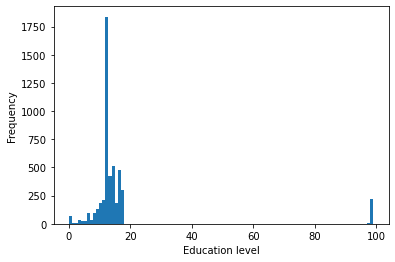

In [13]:
data['educatn'].plot(kind='hist', bins=100)
plt.xlabel('Education level')


Text(0.5, 0, 'Number of kids')

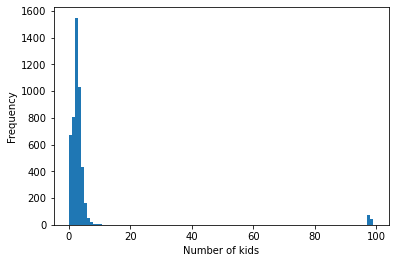

In [14]:
data['kids'].plot(kind='hist', bins=100)
plt.xlabel('Number of kids')

Text(0.5, 0, 'Earnings')

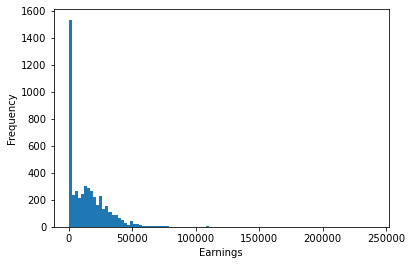

In [17]:
data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('Earnings')

Text(0.5, 0, 'Hours')

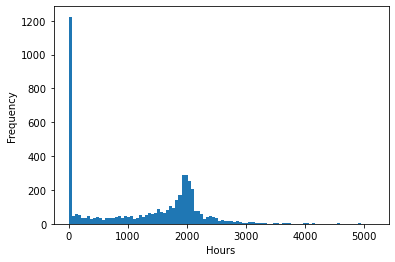

In [18]:
data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

The data in csv is to hrad to visualze  . So we need to remove the invalid data in the data frame . Now, The question is how can we find the invalid data . The outliers in the data should be removed . ( Limiting kids <= 17.5 and education <=20 and earnings<= 150000 and hours > 0)

Text(0.5, 0, 'Education Level')

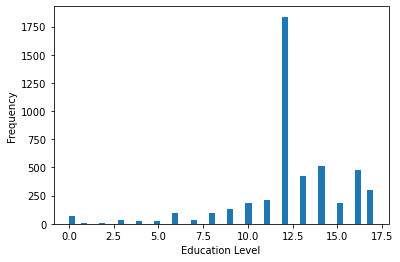

In [21]:
data = data.drop(data[data.educatn > 17.5].index)
data['educatn'].plot(kind='hist', bins=50)
plt.xlabel('Education Level')

Text(0.5, 0, 'Number of Kids')

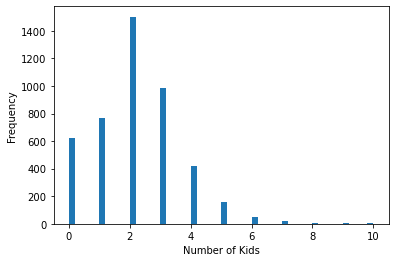

In [33]:
data = data.drop(data[data.kids > 20].index)
data['kids'].plot(kind='hist', bins=50)
plt.xlabel('Number of Kids')

Text(0.5, 0, 'earnings')

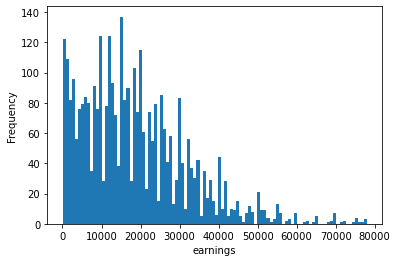

In [41]:
data = data.drop(data[data.earnings > 80000].index)
data = data.drop(data[data.earnings == 0].index)
data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('earnings')

Text(0.5, 0, 'Hours')

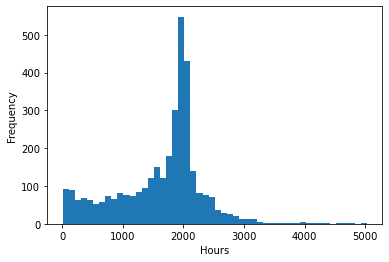

In [47]:
## Removed people who does not work (Hours == 0)
data = data.drop(data[data.hours == 0].index)
data['hours'].plot(kind='hist', bins=50)
plt.xlabel('Hours')

In [48]:
print("Final statistics of the data")
data.describe()


Final statistics of the data


,age,educatn,earnings,hours,kids
count,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000
mean,38.495346,12.877836,18359.803083,1628.101513,2.018034
std,5.445726,2.497639,13550.823768,716.830536,1.333623
min,30.000000,0.000000,13.000000,6.000000,0.000000
25%,34.000000,12.000000,8000.000000,1213.000000,1.000000
50%,38.000000,12.000000,16000.000000,1852.500000,2.000000
75%,43.000000,14.000000,26000.000000,2040.000000,3.000000
max,50.000000,17.000000,78000.000000,5025.000000,10.000000


Identifying independent and dependent variables

Comparisions 

Text(0, 0.5, 'Earnings')

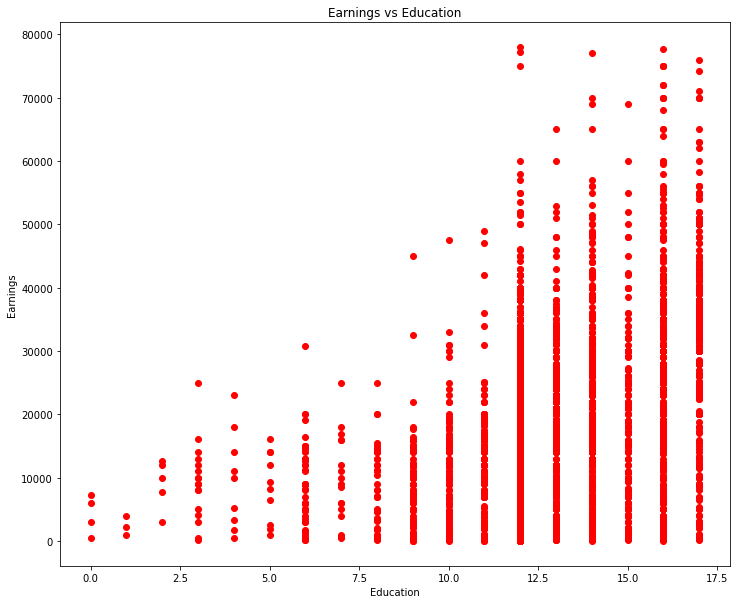

In [53]:
plt.figure(figsize=(12, 10))
plt.plot(data['educatn'], data['earnings'], 'ro')
plt.title('Earnings vs Education')
plt.xlabel("Education")
plt.ylabel("Earnings")

Text(0, 0.5, 'Kids')

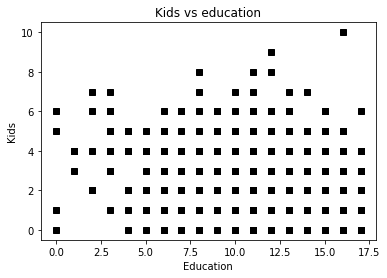

In [60]:
plt.plot(data['educatn'], data['kids'], 'ks')
plt.title('Kids vs education')
plt.xlabel("Education")
plt.ylabel("Kids")

Text(0, 0.5, 'Earnings')

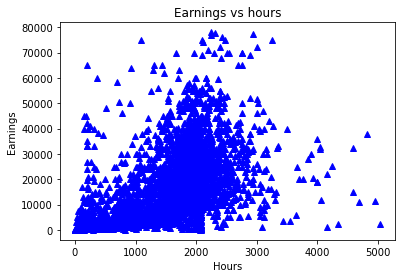

In [57]:
plt.plot(data['hours'], data['earnings'], 'b^')
plt.title('Earnings vs hours')
plt.xlabel("Hours")
plt.ylabel("Earnings")

Text(0, 0.5, 'Hours')

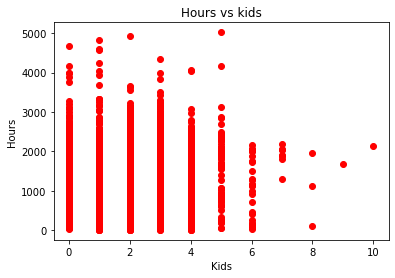

In [59]:
plt.plot(data['kids'], data['hours'], 'ro')
plt.title('Hours vs kids')
plt.xlabel("Kids")
plt.ylabel("Hours")

Identifying correlation between the variables using Pearson's correlation coefficient

We used Pearson's correlation coefficient to identify related variables. We observed the high correlation (=0.466571) between "earnings" and "hours" variables.

In [63]:
data.corr(method='pearson')

,age,educatn,earnings,hours,kids
age,1.000000,-0.010909,0.122661,0.061675,0.153328
educatn,-0.010909,1.000000,0.392124,0.070879,-0.277195
earnings,0.122661,0.392124,1.000000,0.479974,-0.244893
hours,0.061675,0.070879,0.479974,1.000000,-0.113839
kids,0.153328,-0.277195,-0.244893,-0.113839,1.000000


Plotting the Heatmap for most correlated attributes for "earnings"

Index(['educatn', 'earnings', 'hours', 'kids'], dtype='object')


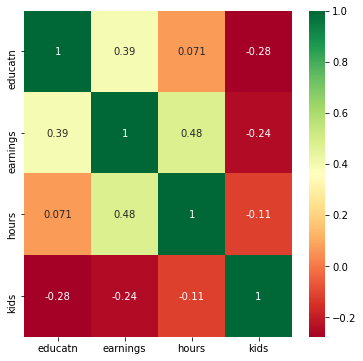

In [65]:
my_data = data
corrValues = my_data.corr(method='pearson')
topCorrFeaturesForEarnig = corrValues.index[abs(corrValues['earnings']) >= 0.2]
print(topCorrFeaturesForEarnig)

plt.figure(figsize=(6,6))
ax = sns.heatmap(my_data[topCorrFeaturesForEarnig].corr(), annot=True, cmap="RdYlGn")

It can be observed that there is a high(=0.466571) linear correlation between| "earnings" and "hours"


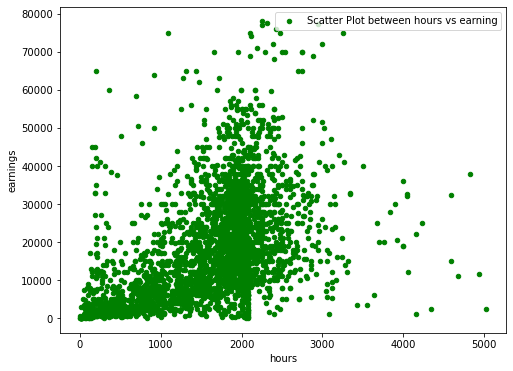

In [69]:
ax = my_data.plot.scatter(x='hours', y='earnings', c='green', figsize=(8, 6), label='Scatter Plot between hours vs earning')

Test for normal distribution for variable Hours

In [71]:
value, p = stat.normaltest(my_data['hours'].sample(50))
print(value, p)
if p >= 0.05:
	print('It is likely that hours are normally distributed.')
else:
	print('It is unlikely that hours are normally distributed.')

2.8791246110122 0.2370314833557523
It is likely that hours are normally distributed.


Extracting 2 random and equal size samples without replacement

In [72]:
samplingSize = 1000
highLowEarningValMargin = my_data.earnings.median()
print(highLowEarningValMargin)

highEarningsWorkingHours = my_data[my_data.earnings> highLowEarningValMargin].hours
print("High earning people count =", highEarningsWorkingHours.count())

lowEarningsWorkingHours = my_data[my_data.earnings<= highLowEarningValMargin].hours
print("Low earning people count =", lowEarningsWorkingHours.count())

16000.0
High earning people count = 1689
Low earning people count = 1749


In [73]:
Hours_of_high_earnings = my_data[my_data.earnings> highLowEarningValMargin].hours.sample(samplingSize).sort_values()
Hours_of_high_earnings.describe()

count    1000.000000
mean     1917.891000
std       467.042713
min       122.000000
25%      1769.250000
50%      1960.000000
75%      2099.250000
max      4233.000000
Name: hours, dtype: float64

In [74]:

Hours_of_low_earnings = my_data[my_data.earnings<= highLowEarningValMargin].hours.sample(samplingSize).sort_values()
Hours_of_low_earnings.describe()

count    1000.000000
mean     1332.970000
std       778.071166
min         6.000000
25%       685.500000
50%      1442.000000
75%      1970.000000
max      5025.000000
Name: hours, dtype: float64

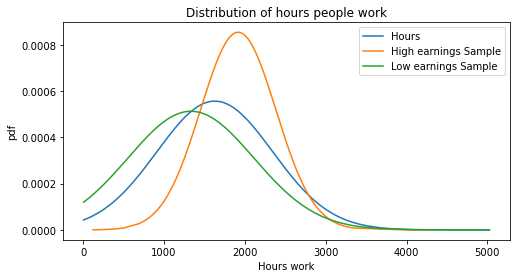

In [75]:
Population = my_data['hours'].sort_values();
PopulationHours = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(Population, PopulationHours, label='Hours')

hour_data_fit1 = stat.norm.pdf(Hours_of_high_earnings, Hours_of_high_earnings.mean(), Hours_of_high_earnings.std())
ax.plot(Hours_of_high_earnings, hour_data_fit1, label='High earnings Sample')

hour_data_fit2 = stat.norm.pdf(Hours_of_low_earnings, Hours_of_low_earnings.mean(), Hours_of_low_earnings.std())
ax.plot(Hours_of_low_earnings, hour_data_fit2, label='Low earnings Sample')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()

Hypothesis testing : Ha = People with high earnings work more hours, 


H0 = People with high or low earnings work the same number of hours

In [76]:
statistics, p = stat.ttest_ind(Hours_of_high_earnings, Hours_of_low_earnings)
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('People with high or low earnings work same number of hours (fail to reject H0)')
else:
	print('People with high earnings work more hours (reject H0)')

Statistics=20.383, p=0.000
People with high earnings work more hours (reject H0)


## Our claim can be proved with the following statistics. 

Statistics=20.562, p=0.000 People who get high salary work more hours
(reject Ho)


The probability distribution of population and samples above (In(75)) clearly states our claim.